In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from ml import Ml
from preprocess import Preprocess
from clean_data import CleanData
from plot import Plot

In [39]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [295]:
train_store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\train_store.csv', engine = 'python')

In [236]:
test_store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\test_store.csv')

In [168]:
store = pd.read_csv(r'C:\Users\sam\Desktop\pharma\data\store.csv', engine = 'python')

In [169]:
ml = Ml()
clean = CleanData()
pt = Plot()
pre = Preprocess()

In [290]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 23 columns):
Unnamed: 0                   844338 non-null int64
Store                        844338 non-null int64
DayOfWeek                    844338 non-null int64
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null int64
SchoolHoliday                844338 non-null int64
Year                         844338 non-null int64
Month                        844338 non-null int64
Day                          844338 non-null int64
WeekOfYear                   844338 non-null int64
SalePerCustomer              844338 non-null float64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          844338 non-null float64
CompetitionOpenS

In [121]:
# train_store.drop('Unnamed: 0', axis=1, inplace=True)
test_store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 11 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Open             41077 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
Year             41088 non-null int64
Month            41088 non-null int64
Day              41088 non-null int64
WeekOfYear       41088 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.0+ MB


In [202]:
test_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 19 columns):
Store                        41088 non-null int64
DayOfWeek                    41088 non-null int64
Open                         41088 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null object
SchoolHoliday                41088 non-null int64
Year                         41088 non-null int64
Month                        41088 non-null int64
Day                          41088 non-null int64
WeekOfYear                   41088 non-null int64
StoreType                    41088 non-null object
Assortment                   41088 non-null object
CompetitionDistance          41088 non-null float64
CompetitionOpenSinceMonth    41088 non-null float64
CompetitionOpenSinceYear     41088 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              41088 non-null float64
Promo2SinceYear             

In [237]:
train_store.drop('Unnamed: 0', axis=1, inplace=True)
test_store.drop('Unnamed: 0', axis=1, inplace=True)


In [238]:
num_col = pre.get_numerical_columns(train_store)
print("the numeric columns are",numr_col)

the numeric columns are ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'SalePerCustomer', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [240]:
# train_store.drop('Unnamed: 0', axis=1, inplace=True)
num_col_test = pre.get_numerical_columns(test_store)
print("the numeric columns are",num_col_test)

the numeric columns are ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']


In [239]:
test_store.drop('Id', axis=1, inplace=True)

In [297]:
cat_col = pre.get_categorical_columns(train_store)
print("the Categorial columns are",cat_col)

the Categorial columns are ['StoreType', 'Assortment', 'PromoInterval']


In [300]:
# train_store.drop(cat_col, axis=1, inplace=True)
to_one_hot_encoding = [col for col in cat_col if train_store[col].nunique() <= 10 and train_store[col].nunique() > 2]
test_store.drop(to_one_hot_encoding, axis=1, inplace=True)

KeyError: "['StoreType' 'Assortment' 'PromoInterval'] not found in axis"

In [244]:
test_store["StateHoliday"] = train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})
# test_store.astype({'StateHoliday': 'int32'}).dtypes

In [294]:
cat_col_test = pre.get_categorical_columns(test_store)
print("the Categorial columns are",cat_col_test)

the Categorial columns are []


In [201]:
pre.get_missing_values(train_store)

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
SalePerCustomer              0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# the missing values had been dealt on the Clean notebook

# extracting new columns

In [9]:
# df2 = df.query("DayOfWeek == 6")
# df2
### extracting new column on weekends
train_store = train_store.assign(weekends = ((train_store.DayOfWeek ==6) | (train_store.DayOfWeek == 7)))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False


In [150]:
test_store = test_store.assign(weekends = ((test_store.DayOfWeek ==6) | (test_store.DayOfWeek == 7)))
test_store

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends
0,1,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False
1,2,3,4,1.0,1,0,0,2015,9,17,38,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False
2,3,7,4,1.0,1,0,0,2015,9,17,38,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,False
3,4,8,4,1.0,1,0,0,2015,9,17,38,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,False
4,5,9,4,1.0,1,0,0,2015,9,17,38,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,0,0,2015,8,1,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",True
41084,41085,1112,6,1.0,0,0,0,2015,8,1,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,True
41085,41086,1113,6,1.0,0,0,0,2015,8,1,31,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,True
41086,41087,1114,6,1.0,0,0,0,2015,8,1,31,a,c,870.0,0.0,0.0,0,0.0,0.0,0,True


In [10]:
### extracting new column on weekdays
train_store = train_store.assign(weekdays = ((train_store.DayOfWeek !=6) & (train_store.DayOfWeek != 7)))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True


In [151]:
### extracting new column on weekdays
test_store = test_store.assign(weekdays = ((test_store.DayOfWeek !=6) & (test_store.DayOfWeek != 7)))
test_store

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays
0,1,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True
1,2,3,4,1.0,1,0,0,2015,9,17,38,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True
2,3,7,4,1.0,1,0,0,2015,9,17,38,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,False,True
3,4,8,4,1.0,1,0,0,2015,9,17,38,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,False,True
4,5,9,4,1.0,1,0,0,2015,9,17,38,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,1.0,0,0,0,2015,8,1,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",True,False
41084,41085,1112,6,1.0,0,0,0,2015,8,1,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,True,False
41085,41086,1113,6,1.0,0,0,0,2015,8,1,31,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,True,False
41086,41087,1114,6,1.0,0,0,0,2015,8,1,31,a,c,870.0,0.0,0.0,0,0.0,0.0,0,True,False


In [11]:
### extracting new column on number of days to holidays
train_store = train_store.assign(number_of_days_to_holidays = (len(train_store.StateHoliday =='0')/len(train_store.StateHoliday != '0')))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True,1.0
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True,1.0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True,1.0
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True,1.0
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True,1.0
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True,1.0


In [153]:
test_store = test_store.assign(number_of_days_to_holidays = (len(test_store.StateHoliday =='0')/len(test_store.StateHoliday != '0')))
test_store

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays
0,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0
1,3,4,1.0,1,0,0,2015,9,17,38,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0
2,7,4,1.0,1,0,0,2015,9,17,38,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,False,True,1.0
3,8,4,1.0,1,0,0,2015,9,17,38,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,False,True,1.0
4,9,4,1.0,1,0,0,2015,9,17,38,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,1.0,0,0,0,2015,8,1,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",True,False,1.0
41084,1112,6,1.0,0,0,0,2015,8,1,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,True,False,1.0
41085,1113,6,1.0,0,0,0,2015,8,1,31,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0
41086,1114,6,1.0,0,0,0,2015,8,1,31,a,c,870.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0


In [ ]:
### extracting new column on number of days after holidays
train_store = train_store.assign(number_of_days_to_holidays = (len(train_store.StateHoliday =='0')/len(train_store.StateHoliday != '0')))
train_store

In [12]:
### extracting new column on Beginning of month, mid month and ending of month
train_store = train_store.assign(beginning_of_month = (train_store.Day < 10) & (train_store.Day >= 1))
train_store = train_store.assign(mid_of_month = (train_store.Day < 20) & (train_store.Day >= 10))
train_store = train_store.assign(end_of_month = (train_store.Day <= 31) & (train_store.Day >= 20))
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0,False,False,True
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,False,True
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,False,True
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,False,True,1.0,False,False,True
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,False,True,1.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,a,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,False,True,1.0,True,False,False
844334,733,2,10765,2377,1,0,a,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,False,True,1.0,True,False,False
844335,769,2,5035,1248,1,0,a,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",False,True,1.0,True,False,False
844336,948,2,4491,1039,1,0,a,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,False,True,1.0,True,False,False


In [154]:
### extracting new column on Beginning of month, mid month and ending of month
test_store = test_store.assign(beginning_of_month = (test_store.Day < 10) & (test_store.Day >= 1))
test_store = test_store.assign(mid_of_month = (test_store.Day < 20) & (test_store.Day >= 10))
test_store = test_store.assign(end_of_month = (test_store.Day <= 31) & (test_store.Day >= 20))
test_store

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0,False,True,False
1,3,4,1.0,1,0,0,2015,9,17,38,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,True,False
2,7,4,1.0,1,0,0,2015,9,17,38,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,False,True,1.0,False,True,False
3,8,4,1.0,1,0,0,2015,9,17,38,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,False,True,1.0,False,True,False
4,9,4,1.0,1,0,0,2015,9,17,38,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,False,True,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,1.0,0,0,0,2015,8,1,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",True,False,1.0,True,False,False
41084,1112,6,1.0,0,0,0,2015,8,1,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,True,False,1.0,True,False,False
41085,1113,6,1.0,0,0,0,2015,8,1,31,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0,True,False,False
41086,1114,6,1.0,0,0,0,2015,8,1,31,a,c,870.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0,True,False,False


### I have add extracted the following new columns 
- by years
- by days
- by weeks
- by weekdays
- by weekends
- by salespercustomer
- by beginning, mid and end of the year


In [13]:
train_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 28 columns):
Store                         844338 non-null int64
DayOfWeek                     844338 non-null int64
Sales                         844338 non-null int64
Customers                     844338 non-null int64
Open                          844338 non-null int64
Promo                         844338 non-null int64
StateHoliday                  844338 non-null object
SchoolHoliday                 844338 non-null int64
Year                          844338 non-null int64
Month                         844338 non-null int64
Day                           844338 non-null int64
WeekOfYear                    844338 non-null int64
SalePerCustomer               844338 non-null float64
StoreType                     844338 non-null object
Assortment                    844338 non-null object
CompetitionDistance           844338 non-null float64
CompetitionOpenSinceMonth     844338 non-null floa

In [155]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 11 columns):
Id               41088 non-null int64
Store            41088 non-null int64
DayOfWeek        41088 non-null int64
Open             41088 non-null float64
Promo            41088 non-null int64
StateHoliday     41088 non-null object
SchoolHoliday    41088 non-null int64
Year             41088 non-null int64
Month            41088 non-null int64
Day              41088 non-null int64
WeekOfYear       41088 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 5.0+ MB


In [156]:
# df.drop('auction_id', axis=1, inplace=True)
numerical_column = train_store.select_dtypes(exclude=["object", "bool"]).columns.tolist()
bool_col = train_store.select_dtypes(include=["bool"]).columns.tolist()
categorical_column = train_store.select_dtypes(include=["object"]).columns.tolist()

numerical_column2 = test.select_dtypes(exclude=["object", "bool"]).columns.tolist()
bool_col2 = test.select_dtypes(include=["bool"]).columns.tolist()
categorical_column2 = test_store.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
numerical_column

In [ ]:
categorical_column

In [157]:
for i in range(len(bool_col)):
    train_store[bool_col[i]] = train_store[bool_col[i]].replace({True: 1, False: 0})
    test_store[bool_col[i]] = test_store[bool_col[i]].replace({True: 1, False: 0})

In [ ]:
# train_store["StateHoliday"] = train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [158]:
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",CompetitionOpenSince
0,1,5,5263,555,1,1,1,2015,7,31,31,9.482883,1270.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,82.0
1,2,5,6064,625,1,1,1,2015,7,31,31,9.702400,570.0,1,13.0,2010.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,92.0
2,3,5,8314,821,1,1,1,2015,7,31,31,10.126675,14130.0,1,14.0,2011.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,103.0
3,4,5,13995,1498,1,1,1,2015,7,31,31,9.342457,620.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,70.0
4,5,5,4822,559,1,1,1,2015,7,31,31,8.626118,29910.0,0,0.0,0.0,0,1,1.0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1,2013,1,1,1,5.962898,150.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,76.0
844334,733,2,10765,2377,1,0,1,2013,1,1,1,4.528818,860.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,159.0
844335,769,2,5035,1248,1,0,1,2013,1,1,1,4.034455,840.0,1,48.0,2012.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0.0
844336,948,2,4491,1039,1,0,1,2013,1,1,1,4.322425,1430.0,0,0.0,0.0,0,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0.0


In [159]:
test_store

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,weekends,weekdays,number_of_days_to_holidays,beginning_of_month,mid_of_month,end_of_month
0,1,4,1.0,1,0,0,2015,9,17,38,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,False,True,1.0,False,True,False
1,3,4,1.0,1,0,0,2015,9,17,38,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",False,True,1.0,False,True,False
2,7,4,1.0,1,0,0,2015,9,17,38,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,False,True,1.0,False,True,False
3,8,4,1.0,1,0,0,2015,9,17,38,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,False,True,1.0,False,True,False
4,9,4,1.0,1,0,0,2015,9,17,38,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,False,True,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,1.0,0,0,0,2015,8,1,31,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",True,False,1.0,True,False,False
41084,1112,6,1.0,0,0,0,2015,8,1,31,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,True,False,1.0,True,False,False
41085,1113,6,1.0,0,0,0,2015,8,1,31,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0,True,False,False
41086,1114,6,1.0,0,0,0,2015,8,1,31,a,c,870.0,0.0,0.0,0,0.0,0.0,0,True,False,1.0,True,False,False


In [246]:
from sklearn.preprocessing import LabelEncoder
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in cat_col if train_store[col].nunique() <= 10]
one_hot_encoded_columns = pd.get_dummies(train_store[to_one_hot_encoding])
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1,1,2013,1,1,1,5.962898,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844334,733,2,10765,2377,1,0,1,1,2013,1,1,1,4.528818,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844335,769,2,5035,1248,1,0,1,1,2013,1,1,1,4.034455,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844336,948,2,4491,1039,1,0,1,1,2013,1,1,1,4.322425,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


In [287]:
from sklearn.preprocessing import LabelEncoder
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in cat_col if train_store[col].nunique() <= 10]
one_hot_encoded_columns1 = pd.get_dummies(train_store[to_one_hot_encoding])

to_one_hot_encoding = [col for col in cat_col if train_store[col].nunique() <= 10]
one_hot_encoded_columns2 = pd.get_dummies(test_store[to_one_hot_encoding])
to_one_hot_encoding.index

KeyError: 'StoreType'

In [259]:
one_hot_encoded_columns1

,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,0,0,1,0,1,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
844333,0,1,0,0,1,0,0,1,0,0,0
844334,0,1,0,0,0,1,0,1,0,0,0
844335,0,1,0,0,0,1,0,0,0,1,0
844336,0,1,0,0,0,1,0,1,0,0,0


In [260]:
train_store.drop(['StoreType', 'Assortment', 'PromoInterval'], axis=1, inplace=True)
train_store = pd.concat([train_store, one_hot_encoded_columns1], axis=1)
train_store

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0
1,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400,570.0,11.0,2007.0,1,13.0,2010.0,1,0,0,0,1,0,0,0,0,1,0
2,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0,0,0,1,0
3,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457,620.0,9.0,2009.0,0,0.0,0.0,0,0,1,0,0,0,1,1,0,0,0
4,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118,29910.0,4.0,2015.0,0,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,566,1,0,1,1,2013,1,1,1,5.962898,150.0,9.0,2006.0,0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,0
844334,733,2,10765,2377,1,0,1,1,2013,1,1,1,4.528818,860.0,10.0,1999.0,0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0
844335,769,2,5035,1248,1,0,1,1,2013,1,1,1,4.034455,840.0,0.0,0.0,1,48.0,2012.0,0,1,0,0,0,1,0,0,0,1,0
844336,948,2,4491,1039,1,0,1,1,2013,1,1,1,4.322425,1430.0,0.0,0.0,0,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0


In [261]:
test_store.drop([ 'StoreType', 'Assortment', 'PromoInterval'], axis=1, inplace=True)
test_store = pd.concat([test_store, one_hot_encoded_columns2], axis=1)
test_store

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,4,1.0,1,NaN,0,2015,9,17,38,1270.0,9.0,2008.0,0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0
1,3,4,1.0,1,NaN,0,2015,9,17,38,14130.0,12.0,2006.0,1,14.0,2011.0,1,0,0,0,1,0,0,0,0,1,0
2,7,4,1.0,1,NaN,0,2015,9,17,38,24000.0,4.0,2013.0,0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,0
3,8,4,1.0,1,NaN,0,2015,9,17,38,7520.0,10.0,2014.0,0,0.0,0.0,1,0,0,0,1,0,0,1,0,0,0
4,9,4,1.0,1,NaN,0,2015,9,17,38,2030.0,8.0,2000.0,0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,1.0,0,NaN,0,2015,8,1,31,1900.0,6.0,2014.0,1,31.0,2013.0,1,0,0,0,1,0,0,0,0,1,0
41084,1112,6,1.0,0,NaN,0,2015,8,1,31,1880.0,4.0,2006.0,0,0.0,0.0,0,0,1,0,0,0,1,1,0,0,0
41085,1113,6,1.0,0,NaN,0,2015,8,1,31,9260.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,0
41086,1114,6,1.0,0,NaN,0,2015,8,1,31,870.0,0.0,0.0,0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,0


In [262]:
train_store.isna().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
SalePerCustomer                   0
CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
StoreType_a                       0
StoreType_b                       0
StoreType_c                       0
StoreType_d                       0
Assortment_a                      0
Assortment_b                      0
Assortment_c                      0
PromoInterval_0                   0
PromoInterval_Feb,May,Aug,No

In [209]:
train_store.shape, test_store.shape

((844338, 21), (41088, 18))

In [31]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'weekends', 'weekdays', 'number_of_days_to_holidays',
       'beginning_of_month', 'mid_of_month', 'end_of_month', 'StateHoliday_0',
       'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c', 'PromoInterval_0',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [263]:
# merging same columns together that has no impact on training
train_store['CompetitionOpenSince'] = np.where((train_store['CompetitionOpenSinceMonth']==0) & (train_store['CompetitionOpenSinceYear']==0) , 
                                        0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (train_store.Year - train_store.CompetitionOpenSinceYear)) )

In [ ]:
# merging same columns together that has no impact on training
train_store['CompetitionOpenSince'] = np.where((train_store['CompetitionOpenSinceMonth']==0) & (train_store['CompetitionOpenSinceYear']==0) , 
                                        0,(train_store.Month - train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (train_store.Year - train_store.CompetitionOpenSinceYear)) )

In [264]:
# getting red of CompetitionOpenSinceYear and CompetitionOpenSinceMonth since they have been merged the merged columns
del train_store['CompetitionOpenSinceYear']
del train_store['CompetitionOpenSinceMonth']
del train_store['CompetitionOpenSinceYear']
del train_store['CompetitionOpenSinceMonth']

In [265]:
train_store.shape

(844338, 29)

In [267]:
test_store.shape

(41088, 27)

In [268]:
def loss_func(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**.5
    mae = mean_absolute_error(y_true,y_pred)
#     mape = mean_absolute_percentage_error(y_true, y_pred)
    return mse, rmse, mae

In [269]:
features = train_store.drop(['Customers', 'Sales', 'SalePerCustomer'], axis = 1) 
col_name = features.columns.tolist()
targets=np.log(train_store.Sales)
#col_name

In [270]:
# I have reversed the order because the test set was the past and the train was future 

y_train_test, y_train, X_train_test, X_train = train_test_split(targets, features, test_size=0.80, shuffle=False)
print ("Training and testing split was successful.")

Training and testing split was successful.


In [271]:
X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape 

((675471, 26), (168867, 26), (675471,), (168867,))

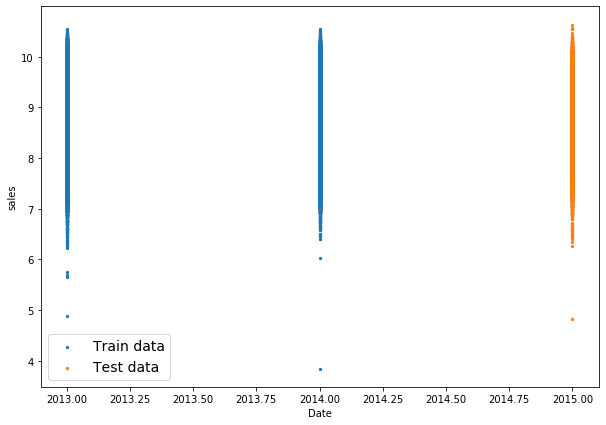

In [272]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train['Year'], y_train, s=5, label="Train data")
plt.scatter(X_train_test['Year'], y_train_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("sales")
plt.legend(fontsize=14)
plt.show();

# buliding a Pipeline

In [273]:
# bulid a pipeline
model_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor(n_estimators=10, 
                             criterion='mse', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                            ))])
model_pipeline.fit(X_train, y_train)



# std_scaler = StandardScaler()
# df_scaled = std_scaler.fit_transform(train_store)
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=5, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [274]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_error #, mean_absolute_percentage_error
y_pred = model_pipeline.predict(X_train_test)
mse, rmse, mae = loss_func(y_train_test, y_pred)
print("the mse is {}, rmse {}, mae {} ".format(mse, rmse, mae))

the mse is 0.1277464608020323, rmse 0.35741636896207246, mae 0.2765425478237141 


In [78]:
!pip install pickle-mixin

  Created wheel for pickle-mixin: filename=pickle_mixin-1.0.2-cp37-none-any.whl size=6003 sha256=360d36862a7fcb3cd9e21fcd8166be3856d77cb42f0a547f7ba3eea9598f0b67
  Stored in directory: C:\Users\sam\AppData\Local\pip\Cache\wheels\cd\05\42\71de70fa36b9cbb7657bb5793a16f8028c1cdc1bdd3b8e1ac3
Successfully built pickle-mixin


In [286]:
# Pickle to serialize and deserialize
import pickle
from datetime import datetime
date = datetime.now()
dt_string = date.strftime("%d-%m-%Y-%H-%M-%S")
pickle.dump(model_pipeline, open('../models/{}.pkl'.format(dt_string), 'wb'))# reconstructed = pickle.loads(pickled_model)


Store , Score: 0.00430
DayOfWeek , Score: 0.07769
Open , Score: 0.00000
Promo , Score: 0.59373
StateHoliday , Score: 0.00000
SchoolHoliday , Score: 0.00000
Year , Score: 0.00000
Month , Score: 0.01043
Day , Score: 0.00359
WeekOfYear , Score: 0.06065
CompetitionDistance , Score: 0.05902
Promo2 , Score: 0.00000
Promo2SinceWeek , Score: 0.00000
Promo2SinceYear , Score: 0.07407
StoreType_a , Score: 0.00000
StoreType_b , Score: 0.04643
StoreType_c , Score: 0.00000
StoreType_d , Score: 0.00000
Assortment_a , Score: 0.06145
Assortment_b , Score: 0.00000
Assortment_c , Score: 0.00094
PromoInterval_0 , Score: 0.00000
PromoInterval_Feb,May,Aug,Nov , Score: 0.00000
PromoInterval_Jan,Apr,Jul,Oct , Score: 0.00000
PromoInterval_Mar,Jun,Sept,Dec , Score: 0.00000
CompetitionOpenSince , Score: 0.00771


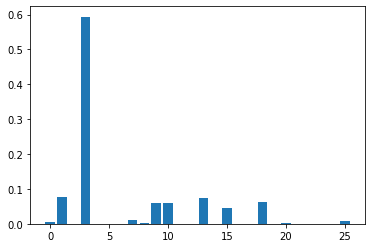

In [275]:
importance = model_pipeline.named_steps["model"].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(col_name[i], ', Score: %.5f' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## we can see the Promo was a big factor on the training

In [80]:
df_scaled.to_csv('../data/scaled_data.csv')
